## Semantic segmentation preprocessor 

In [64]:
from PIL import Image
from leap.datasets.physics_dataset import pil_loader, resize_and_crop
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle
%matplotlib inline

### 1. K-Means semantic segmentation

In [123]:
n_images = 10

In [124]:
data = [ ]
for n in range(n_images):
    img = pil_loader('/data/datasets/logs/cmu_wyao/data/physics_ball_5_s1_Ball/raw/0/fig_%d.png'%n)
    img = resize_and_crop('train', img, 64, 64)
    arr = np.array(img).reshape(-1,3)
    data.append(arr)
data = np.concatenate(data,axis=0)

In [54]:
n_clusters = 6

In [55]:
segmenter = KMeans(n_clusters = n_clusters)
segmenter.fit(data)

KMeans(n_clusters=6)

In [129]:
labels = segmenter.predict(data).reshape(n_images, 64,64)

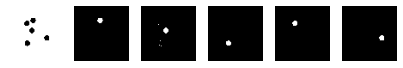

In [125]:
fig, axs = plt.subplots(1,6, figsize=(7,1))
for c in range(n_clusters):
    ax = axs[c]
    ax.imshow(labels[0]==c, cmap='gray')
    ax.set_xlabel('Cluster %d'%c)
    ax.axis('off')

In [159]:
with open("/home/cmu_wyao/kmeans_segmenter.pkl", "wb") as f:
    pickle.dump(segmenter, f)

(-0.5, 63.5, 63.5, -0.5)

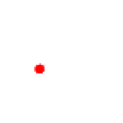

In [136]:
fig = plt.figure(figsize=(2,2))
arr = np.array(img)
arr[labels[-1] != 3] = 255
plt.imshow(arr)
plt.axis('off')

In [138]:
import torch

In [145]:
mask = torch.nn.functional.one_hot(torch.LongTensor(labels))

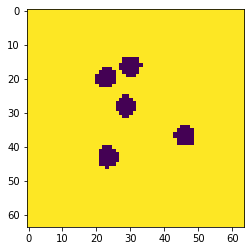

In [154]:
plt.imshow(mask[0,:,:,0].numpy())

In [157]:
mask[0,:,:,1:].shape

torch.Size([64, 64, 5])